In [15]:
def classificateWithNumbersThreeTarget(value):
    target=0
    if(value>=0.0015):
        target=1
    elif(value<=-0.0015):
        target=-1
    else:
        target=0
    return target


def split_sequence_modified(sequence, n_steps_in):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        # check if we are beyond the sequence
        if end_ix+5 > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sum(sequence[end_ix:end_ix+5])
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

def graph(test_y,yhat,mennyiseg,oszlop):
    valos=test_y[:,oszlop-1][:mennyiseg]
    predikt=yhat[:,oszlop-1][:mennyiseg]
    valos = pd.DataFrame(valos, columns=['Real'])
    predikt = pd.DataFrame(predikt, columns=['Predicted'])
    merge=valos.join(predikt)
    
    plt.figure(figsize=(30,20))
    sns.lineplot(data=merge, linewidth=3)
    plt.show()

def correlation_heatmap(df):
    correlations = df.corr()

    fig, ax = plt.subplots(figsize=(40,40))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.1, annot=True, cbar_kws={"shrink": .7})
    sns.set(font_scale=2)
    plt.show();
    
    
    
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def metrikak(y_true,y_pred):
    print(mean_squared_error(y_true,y_pred))
    print(mean_absolute_percentage_error(y_true,y_pred))
from numpy import hstack
import array
from numpy import array
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
print("Setup Complete")
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

def percentChange(lastValue,secondLastValue):
        return round((float(lastValue)-secondLastValue)/abs(secondLastValue),6)


def kirajzoltatas(yhat,test_y):
    yhat = pd.DataFrame(yhat, columns=['Predicted'])
    test_y2 = pd.DataFrame(test_y, columns=['Real'])
    merge=test_y2.join(yhat)

    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(30,20))
    sns.lineplot(data=merge[:100], linewidth=3)
    plt.show()

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)



tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)
    
#data1 = pd.read_csv('/home/balazs/Desktop/adathalmazok/btc_2012-2021/btc_split_data_part_06', sep=",", header=None)
#data1.columns = ["time", "open", "high", "low","close","volume",'drop1','drop2']

#data2 = pd.read_csv('/home/balazs/Desktop/adathalmazok/btc_2012-2021/btc_split_data_part_07', sep=",", header=None)
#data2.columns = ["time", "open", "high", "low","close","volume",'drop1','drop2']

#data3 = pd.read_csv('/home/balazs/Desktop/adathalmazok/btc_2012-2021/btc_split_data_part_08', sep=",", header=None)
#data3.columns = ["time", "open", "high", "low","close","volume",'drop1','drop2']

data4 = pd.read_csv('/home/balazs/Desktop/adathalmazok/btc_2012-2021/btc_split_data_part_09', sep=",", header=None)
data4.columns = ["time", "open", "high", "low","close","volume"]

#data= pd.concat([data1,data2,data3,data4], axis=0)
data=data4.dropna()
data=data[['time','open','high','low','close','volume']]
#data

#data=data4
    

Setup Complete


In [8]:
values=data.close.values[len(data)-10000:]
len(values)

10000

In [201]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
close_values=scaler.fit_transform(np.array(values).reshape(-1,1))
len(close_values)

10000

In [33]:
train = close_values[0 : int(len(close_values)*0.8)]
test = close_values[int(len(close_values)*0.8):]

NameError: name 'close_values' is not defined

In [214]:
n_steps_in, n_steps_out = 10, 1
train_X, train_y = split_sequence(train, n_steps_in, n_steps_out)

n_features = 1
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))

test_X, test_y = split_sequence(test, n_steps_in, n_steps_out)

#n_features = 1
#train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))

In [21]:
#----------------------------------------------------

In [22]:
percents=data.close.pct_change()[1:][len(data)-10001:]

In [73]:
percents.values

array([-0.00012124, -0.00018411,  0.0014105 , ...,  0.00064803,
        0.00062581,  0.00029935])

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
percent_values=scaler.fit_transform(np.array(percents).reshape(-1,1))
percent_values

array([[0.48788759],
       [0.48368706],
       [0.59022931],
       ...,
       [0.53928548],
       [0.5378011 ],
       [0.51598909]])

In [25]:
train = percent_values[0 : int(len(percent_values)*0.8)]
test = percent_values[int(len(percent_values)*0.8):]


In [26]:
n_features = 1
n_steps_in, n_steps_out = 10, 1

train_X, train_y = split_sequence(train, n_steps_in)
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))

#test_X, test_y = split_sequence(test, n_steps_in)
#test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))


In [74]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import keras

opt = tf.keras.optimizers.Adam(learning_rate=0.1,decay=1e-2)
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=opt, loss='mape')


In [75]:
model.fit(train_X, train_y, epochs=20, verbose=1,batch_size=64)

Epoch 1/20
125/125 [==============================] - 4s 19ms/step - loss: 5625505.5000
Epoch 2/20
125/125 [==============================] - 2s 20ms/step - loss: 53607.8672
Epoch 3/20
125/125 [==============================] - 3s 21ms/step - loss: 78209.0781
Epoch 4/20
125/125 [==============================] - 2s 20ms/step - loss: 135520.1406
Epoch 5/20
125/125 [==============================] - 3s 22ms/step - loss: 67492.0781
Epoch 6/20
125/125 [==============================] - 2s 20ms/step - loss: 6608.8208
Epoch 7/20
125/125 [==============================] - 2s 20ms/step - loss: 58736.0195
Epoch 8/20
125/125 [==============================] - 3s 21ms/step - loss: 65121.2031
Epoch 9/20
125/125 [==============================] - 3s 21ms/step - loss: 70425.5156
Epoch 10/20
108/125 [========================>.....] - ETA: 0s - loss: 55293.7031

KeyboardInterrupt: 

In [70]:
yhat=model.predict(test_X)

In [71]:
metrikak(test_y,yhat)

0.0030910812830641323
8.563534781470963


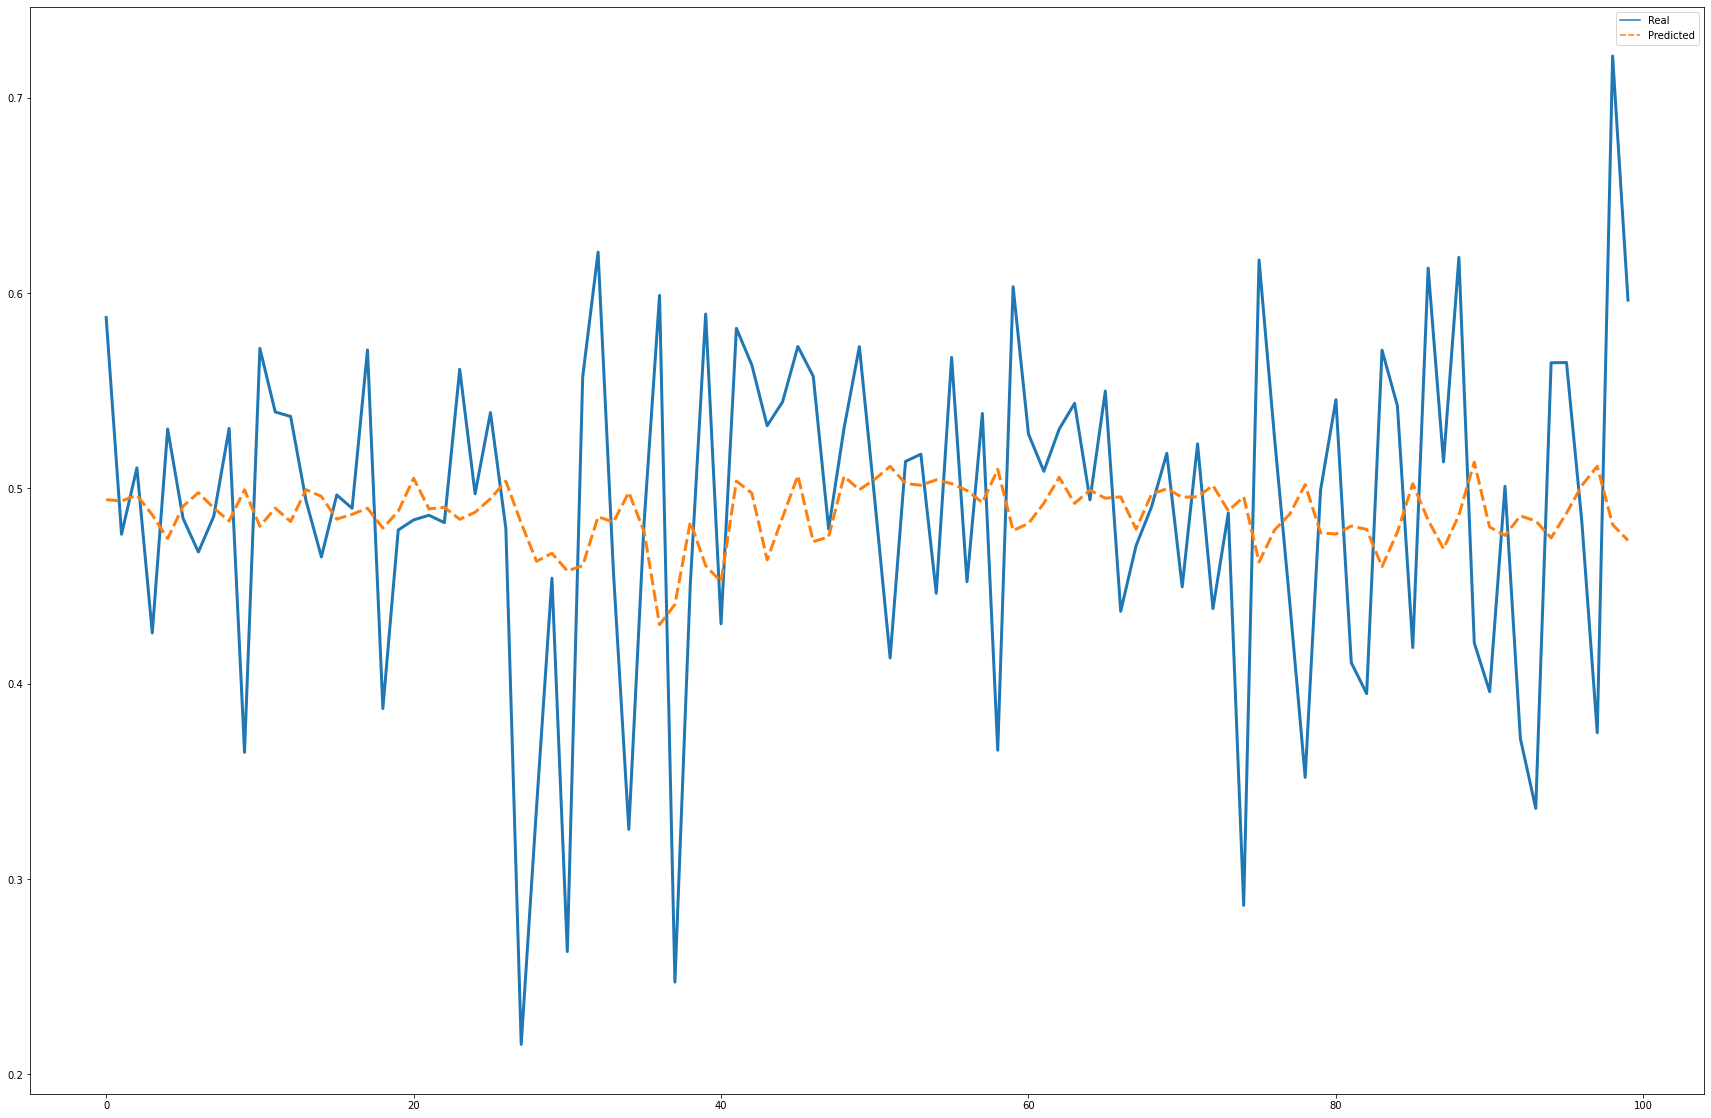

In [72]:
graph(test_y,yhat,100)

In [41]:
test_y

array([[0.58744849],
       [0.47651583],
       [0.51053966],
       ...,
       [0.53928548],
       [0.5378011 ],
       [0.51598909]])

In [40]:
yhat

array([[0.49963975],
       [0.5004475 ],
       [0.50011134],
       ...,
       [0.49907452],
       [0.49880278],
       [0.49850908]], dtype=float32)

In [194]:
metrikak(test_y,yhat)

10457.922211303792
0.15775338281021756


In [193]:
test_y=scaler.inverse_transform(test_y)

In [190]:
yhat

array([[57517.305],
       [57416.656],
       [57417.47 ],
       ...,
       [58584.996],
       [58627.836],
       [58666.15 ]], dtype=float32)

In [42]:
def graph(test_y,yhat,mennyiseg):
    import matplotlib.pyplot as plt
    #valos=test_y.reshape(1,-1)
    #predikt=yhat.reshape(1,-1)
    valos = pd.DataFrame(test_y, columns=['Real'])
    predikt = pd.DataFrame(yhat, columns=['Predicted'])
    merge=valos.join(predikt)
    
    plt.figure(figsize=(30,20))
    sns.lineplot(data=merge[:mennyiseg], linewidth=3)
    plt.show()

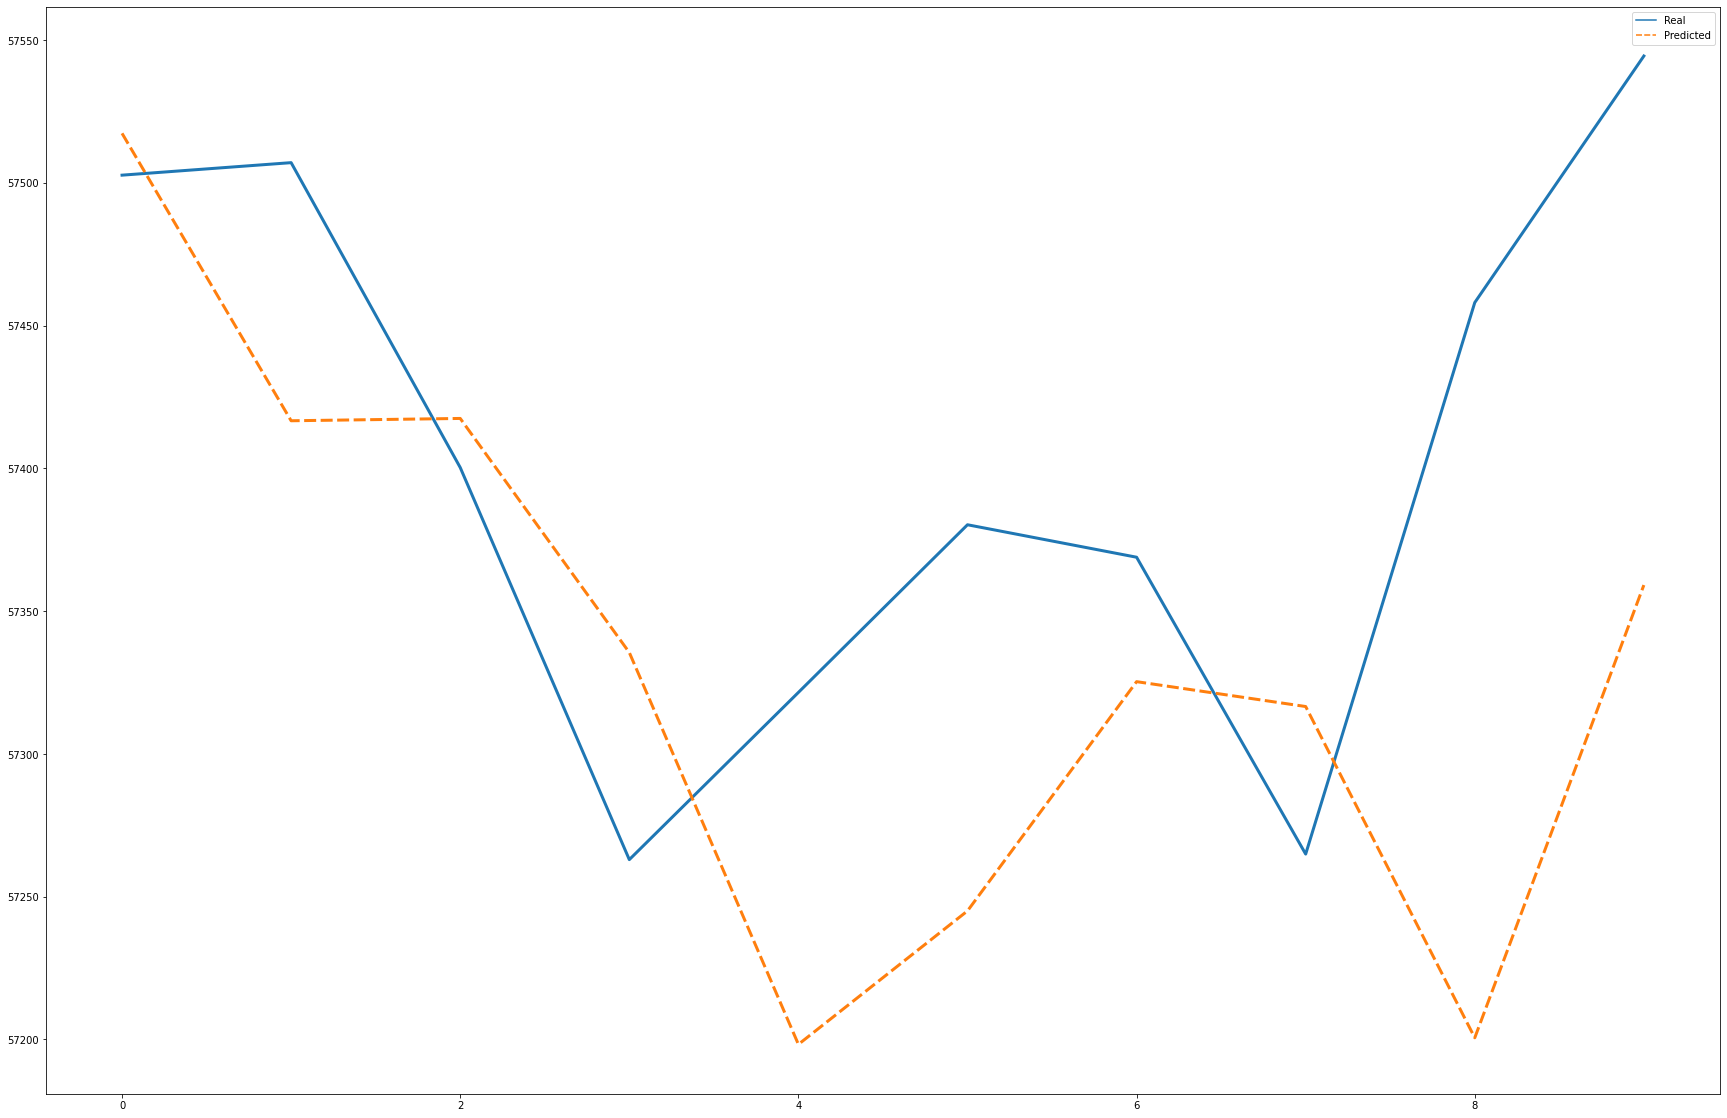

In [198]:
graph(test_y,yhat,10)